# Crawling

* 웹 상의 데이터를 크롤링 / 파일 형태(hwp, xlsx, pdf)의 데이터를 크롤링

* 웹 상의 데이터를 수집하기 위해서 크롤링을 사용
1. 웹 페이지 접속
2. 요청 → 응답
3. 해당 웹페이지의 위치 확인
4. 값을 가져옴
5. 데이터 형식 확인
6. 목적에 맞게 데이터 변환
7. 데이터 저장

# 웹 데이터 크롤링
* 웹 상의 데이터 크롤링

## Requests : 요청 라이브러리
* 설치: !pip install requests
* HTTP 요청을 보내는데 사용하는 라이브러리
* 클라이언트의 요청을 처리함

In [1]:
import requests

In [2]:
# 버전 확인
print(requests.__version__)

2.27.1


[ get ]
- 200번대: 성공
- 400, 500번대: 에러

In [3]:
# 가져올 http주소를 requests.get으로 가져오기
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [4]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

### post 요청 보내는 방법
```
import json

body = { 'id': 'aaa', 'pw': 1234 }
post = requests.post('url', data=json.dumps(body))
```

## BeautifulSoup : HTML 변환 라이브러리

In [5]:
from bs4 import BeautifulSoup

html = requests.get('http://paullab.synology.me/stock.html')
text = html.text

In [ ]:
soup = BeautifulSoup(text, 'html.parser')
print(soup)

In [7]:
soup.title

<title>Document</title>

In [8]:
soup.title.string

'Document'

* soup.table == soup.find('table')

In [ ]:
soup.table

In [ ]:
soup.find('table')

* <태그 속성='값'></태그>
* id='stock': 페이지 당 하나 -> selector
* class='2022': 페이지(html 파일 안에) 당 -> selector(선택자)

* find : HTML 문서에서 해당 조건을 만족하는 첫 번째 요소만 반환
* find_all : HTML 문서에서 해당 조건을 만족하는 모든 요소를 찾아 리스트 형태로 반환

In [11]:
# span태그의 id가 update인 값
soup.find('span', id=('update'))

<span id="update">update : 20.12.30</span>

In [ ]:
soup.find_all('table', class_='table')
# 결과값은 리스트로 반환, [0] 인덱싱 가능

In [ ]:
tag = soup.find(id='update')
dir(tag)  # dir -> .을 찍고 사용할 수 있는 메서드의 목록을 보여줌

In [14]:
tag.name

'span'

In [15]:
tag['id']

'update'

### select

**select는 결과값을 리스트로 반환**

* id값으로 찾을 때
```
soup.select('#아이디명')
# find문: soup.find(id='아이디명') 과 같음
```


* class명으로 찾을 때
```
soup.select('.클래스명')
# find문: soup.find_all(class_='클래스명') 과 같음
```

In [16]:
# id명이 update인 데이터를 select로 가져오기
print(soup.select('#update'))
print(soup.find(id = 'update'))
# 두 결과값이 같지만 select는 리스트로 반환

[<span id="update">update : 20.12.30</span>]
<span id="update">update : 20.12.30</span>


In [17]:
# class명이 table인 데이터를 select로 가져오기
soup.select('.table')
# 리스트로 반환

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">ë ì§</th>
 <th scope="col">ì¢
 ê°</th>
 <th scope="col">ì ì¼ë¹</th>
 <th scope="col">ìê°</th>
 <th scope="col">ê³ ê°</th>
 <th scope="col">ì ê°</th>
 <th scope="col">ê±°ëë</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="íë½" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                       

* 자식 선택하기 ( > )
```
soup.select('.부모클래스 > 자식명')
```

In [18]:
# table 클래스 중 tbody자식을 선택
soup.select('.table > tbody')
# 리스트로 반환

[<tbody>
 <tr>
 <th scope="col">ë ì§</th>
 <th scope="col">ì¢
 ê°</th>
 <th scope="col">ì ì¼ë¹</th>
 <th scope="col">ìê°</th>
 <th scope="col">ê³ ê°</th>
 <th scope="col">ì ê°</th>
 <th scope="col">ê±°ëë</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="íë½" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         

In [19]:
# table 클래스 아래에 자식 tbody가 있기 때문에 건너뛰어서 바로 tr로 갈 수 없음
soup.select('.table > tr')
# 빈 리스트 반환

[]

In [20]:
# tr로 가고 싶으면 자식의 순서를 지켜야함
soup.select('.table > tbody > tr')
# 리스트로 반환, 인덱싱 사용 가능[0]

[<tr>
 <th scope="col">ë ì§</th>
 <th scope="col">ì¢
 ê°</th>
 <th scope="col">ì ì¼ë¹</th>
 <th scope="col">ìê°</th>
 <th scope="col">ê³ ê°</th>
 <th scope="col">ì ê°</th>
 <th scope="col">ê±°ëë</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="íë½" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>

* 여러번 접근하기

In [21]:
# class가 main인 요소들 -> 그 중 [2]번째 요소를 변수에 넣기
one = soup.select('.main')[2]
one

<div class="main">
<h2 id="ì ì£¼ì½ë©ë² ì´ì¤ìº íì°êµ¬ì">ì ì£¼ì½ë©ë² ì´ì¤ìº í ì°êµ¬ì</h2>
<h3><span style="color: salmon">ì¼ë³</span> ìì¸</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">ë ì§</th>
<th scope="col">ì¢
ê°</th>
<th scope="col">ì ì¼ë¹</th>
<th scope="col">ìê°</th>
<th scope="col">ê³ ê°</th>
<th scope="col">ì ê°</th>
<th scope="col">ê±°ëë</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">


In [22]:
# tbody에서 자식 tr을 찾아 변수에 넣기
two = one.select('tbody > tr')
two

[<tr>
 <th scope="col">ë ì§</th>
 <th scope="col">ì¢
 ê°</th>
 <th scope="col">ì ì¼ë¹</th>
 <th scope="col">ìê°</th>
 <th scope="col">ê³ ê°</th>
 <th scope="col">ì ê°</th>
 <th scope="col">ê±°ëë</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="íë½" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>

1. 마우스 오른쪽 클릭
2. 검사
3. 마우스 모양 클릭
4. 내가 원하는 곳 찾기
5. 마우스 오른쪽 클릭
6. copy -> copy select(경로 복사됨)

In [23]:
# <table> 태그 중 클래스가 'table'인 것의 [0]번째 값
a = soup.find_all('table', class_='table')[0]
a

<table class="table table-hover">
<tbody>
<tr>
<th scope="col">ë ì§</th>
<th scope="col">ì¢
ê°</th>
<th scope="col">ì ì¼ë¹</th>
<th scope="col">ìê°</th>
<th scope="col">ê³ ê°</th>
<th scope="col">ì ê°</th>
<th scope="col">ê±°ëë</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="ìì¹ " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="íë½" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                            190
                     

## FinanceDataReader : 금융데이터 크롤링 라이브러리

* 주식 가격, 지수, 환율, 암호 화폐 가격 등
* 시계열 데이터 수집
* 거래소별, 종목별, 코드별, 단축코드별 데이터 수집 가능
* **fdr을 통해 데이터를 불러오면 데이터프레임 형태로 값을 반환함**

### 라이브러리 설치

In [24]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 라이브러리 사용

In [25]:
import FinanceDataReader as fdr

In [26]:
fdr.__version__

'0.9.50'

### krx 한국 거래소의 주식 리스트

* StockListing : 주식 종목 리스트를 가져오는 클래스
* StockListing을 사용하여 주식 종목 리스트를 가져오면 종목의 심볼, 이름, 거래소 등의 정보를 확인할 수 있음

In [27]:
df_krx = fdr.StockListing('krx')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70300,1,1500,2.18,69800,70400,69500,19549511,1370668892150,419675713265000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,578000,2,-5000,-0.86,580000,583000,575000,113909,65876235000,135252000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109200,1,5700,5.51,107500,110500,106100,10136706,1096927604183,79497858258000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,777000,2,-2000,-0.26,778000,782000,773000,26777,20820335000,55302198000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,706000,2,-6000,-0.84,708000,716000,697000,133917,94461654000,49838194158000,70592343,STK


### 데이터 확인해보기
* shape, describe, info

In [28]:
df_krx.shape
# 주식 종목 2717개의 17가지 정보 == 2717개의 행, 17개의 열

(2717, 17)

In [29]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-132.883695,-0.586688,20875.461907,21134.966507,20506.766654,6.686237e+05,6.434566e+09,8.964942e+11,4.186701e+07
std,950.560812,3.035047,53288.102323,53768.544414,52542.783276,3.365294e+06,3.996815e+10,9.074534e+12,1.343060e+08
min,-24500.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.040000e+09,1.098520e+05
25%,-150.000000,-1.730000,2885.000000,2960.000000,2815.000000,1.899900e+04,1.237894e+08,6.283355e+10,1.001394e+07
50%,-30.000000,-0.620000,6830.000000,6990.000000,6650.000000,7.689100e+04,4.852449e+08,1.258814e+11,1.954779e+07
75%,5.000000,0.130000,16880.000000,17200.000000,16560.000000,2.610870e+05,2.356161e+09,3.003873e+11,4.123263e+07
max,13000.000000,30.000000,778000.000000,782000.000000,773000.000000,8.187279e+07,1.370669e+12,4.196757e+14,5.969783e+09


In [30]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


### 단일 종목의 주식 가격

* 삼성전자(005930) 코드번호 사용

In [31]:
samsung_df = fdr.DataReader('005930')
samsung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [32]:
# 2022년부터 ~
samsung_df_2022 = fdr.DataReader('005930', '2022')
samsung_df_2022

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [33]:
# 2022년 1월부터 12월 말일까지 - 첫번째 방법
samsung_df_2022_ = fdr.DataReader('005930', '2022', '2023')
samsung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [ ]:
# 원하는 기간 설정
samsung_df_2022_ = fdr.DataReader('005930', '2022-01-01', '2022-03-31')
samsung_df_2022_

### 상장폐지 종목 데이터

* 상장 폐지가 된 종목들은 krx에서 확인할 수 없음
* exchange 매개변수에 krx-delisting으로 설정하면 폐지된 종목들의 리스트를 가져올 수 있음
* exchange : 주식 거래소를 지정하는 매개변수

In [ ]:
# 003497 상장 폐지 -> krx에는 데이터가 없음 -> exchange='krx-delisting'
del_stock = fdr.DataReader('003497', exchange = 'krx-delisting')
del_stock

### 단일 종목 그래프

In [ ]:
# 원하는 컬럼값만 가져오기
samsung_df_2022_['Close']

<Axes: xlabel='Date'>

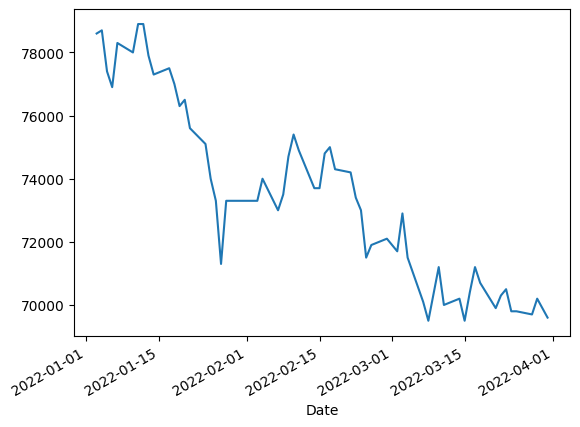

In [40]:
# plot을 통해 그래프 그리기
samsung_df_2022_['Close'].plot()

<Axes: xlabel='Date'>

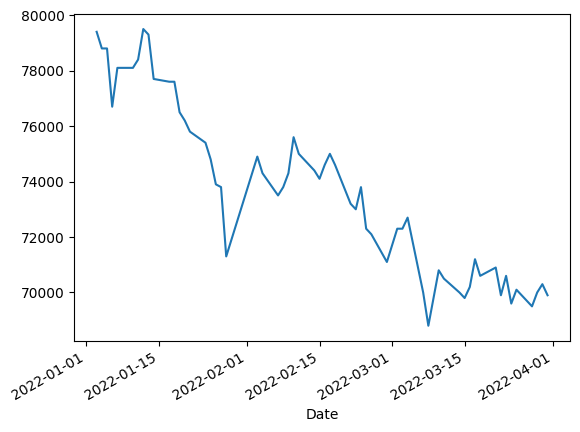

In [41]:
# 시가(Open) 데이터를 그래프로 그려보기
samsung_df_2022_['Open'].plot()

### 환율 데이터

* EUR/USD(유로당 달러), CNY/KRW(위엔당 원), JPY/KRW(엔당 원), USD/JPY(달러당 엔) ...

In [42]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')  # 달러당 원
ex_us_kw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0
2023-05-25,1318.520020,1330.109985,1317.349976,1318.520020,1318.520020,0


<Axes: xlabel='Date'>

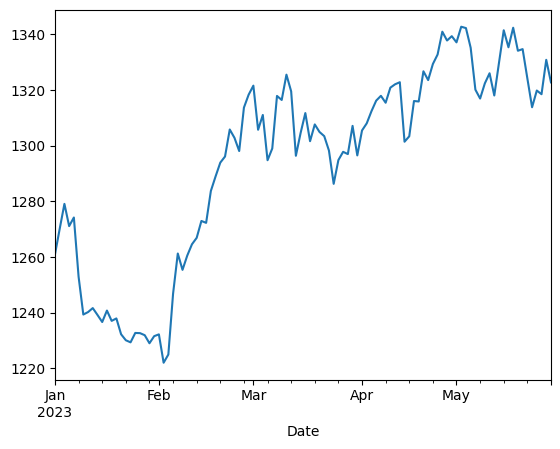

In [43]:
ex_us_kw_df['Close'].plot()

### 암호화폐 데이터
* BTC/KRW(비트코인당 원), ETH/KRW(이더리움당 원), XRP/KRW(리플당 원), BTC/USD(비트코인당 달러) ...

In [44]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-25,35941648.0,35941648.0,34468484.0,34730844.0,34730844.0,21495559019063
2023-05-26,34723780.0,35363796.0,34233036.0,35245524.0,35245524.0,18438822300836
2023-05-27,35242828.0,35683144.0,34915080.0,35361112.0,35361112.0,16822938231443


<Axes: xlabel='Date'>

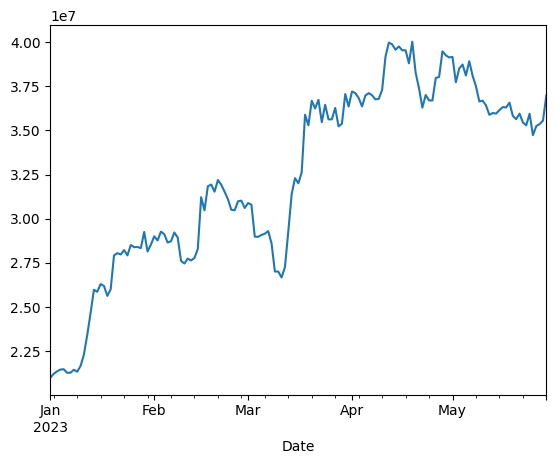

In [45]:
btc_krw_df['Close'].plot()

# 파일 데이터 크롤링
* 파일 형태의 데이터들(hwp, xlsx, pdf)
* 한글(hwp) -> 엑셀(xlsx)
* PDF -> txt

## 한글(hwp) 파일 크롤링
* ole 라이브러리 사용

### ole 라이브러리 설치

In [46]:
!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import ole

# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)

```
[서식. 참가신청서] 
<교육 참가신청서>
<교 육 명><인공지능을 활용한 업무자동화 교육>
<교육일시><2019년 2월 15일(금) ~ 17일(일), 2박 3일>
<참가자 정보><성    명><홍길동><소    속><세종대학교><연 락 처><010.0000.0000>
<E-mail><example_jeju_gdg><주    소><서울특별시 중랑구><연 령 대>
<□ 10대       □ 20대      □ 30대      □ 40대이상>
<신청내용><관심분야 (중복선택가능)>
<□ HTML&CSS  □ Javascript  □ Python  □ 서비스기획·런칭  □ 기타 (          )>
<지원동기 (자유롭게 서술)>
<평소에 파이썬에 관심이 많았습니다.  업무자동화를 저의 업무에 적용하고 싶었는데.  
마침 좋은 기회가 있어서 지원하게 되었습니다.  이런 기회를 주셔서 감사합니다. >
<기술역량  및 경험 (자유롭게 서술)><파이썬은 1년 했고, 다른 쪽 개발 경험은 없습니다.  파이썬을 배우고 싶습니다. >
<상기와 같이 참가를 신청합니다. 2019년   1월   일 <신 청 자 :><홍길동><(서명 또는 날인) >>
```

## excel 파일로 변환

In [52]:
# excel 파일로 변환하기

columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']

df = pd.DataFrame(columns=columns)


# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '지원동기', '연 령 대']

info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

In [ ]:
# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

In [ ]:
# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

## PDF 데이터 크롤링

In [54]:
# pdfminer 설치
!pip install pdfminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.7 MB/s eta 0:00:00
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140092 sha256=d0d250b427deab3903394e10e0708f0edd90ab2000b093383c7eca586fe067bc
  Stored in directory: /root/.cache/pip/wheels/4e/c1/68/f7bd0a8f514661f76b5cbe3b5f76e0033d79f1296012cbbf72
Successfully built pdfminer


In [55]:
# 모듈 임포트
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [56]:
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/예제.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제

## 1번
- Requests, BeatifulSoup을 이용해서 http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째(==[1])값을 가져와주세요.

In [57]:
import requests
from bs4 import BeautifulSoup

In [78]:
html = requests.get('http://paullab.synology.me/stock.html')
html.encoding = 'utf-8'
text = html.text

In [79]:
soup = BeautifulSoup(text, 'html.parser')

In [ ]:
# select로 가져오기
soup.select('.main')[1]

* main 클래스의 자식 table 가져오기

In [ ]:
soup.select('.main > table')

## 2번
- 제주코딩베이스캠프 연구원의 일별 시세 테이블을 가져오기

In [ ]:
# 찾고 싶은 영역 -> 마우스 우클릭 -> copy -> copy select
soup.select('body > div:nth-child(3) > table')

In [89]:
one = soup.select('.main')[2]
two = soup.select('table')

## 3번
- (주) 캣네생선의 이미지를 불러와서 위 아래, 좌 우 반전시켜주세요.

In [93]:
# 필요한 모듈 임포트
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 불러오기
cat = Image.open('cats_stock.png')
# cat

# 배열로 변환
import numpy as np
pixel = np.array(cat)

# 위아래 반전
plt.imshow(pixel[::-1])
# 좌우 반전
plt.imshow(pixel[:, ::-1])

## 4번
- sk하이닉스의 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 나타내주세요.

<Axes: xlabel='Date'>

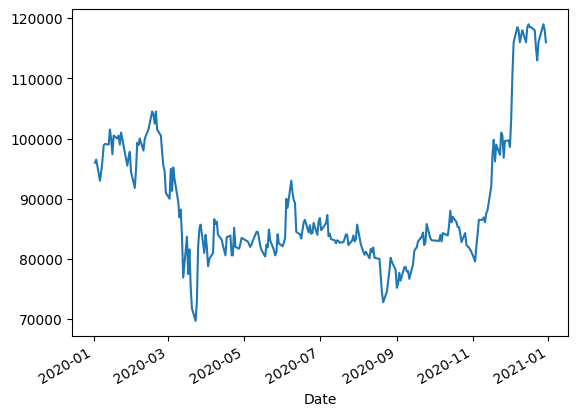

In [98]:
# 모듈 임포트
import FinanceDataReader as fdr

# 한국주식거래소에서 sk하이닉스 코드 확인
df_krx = fdr.StockListing('krx')

# sk 하이닉스 단일 종목 조회
sk_df = fdr.DataReader('000660', '2020', '2021')

# 시가 그래프
sk_df['Open'].plot()